In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

In [2]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [4]:
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

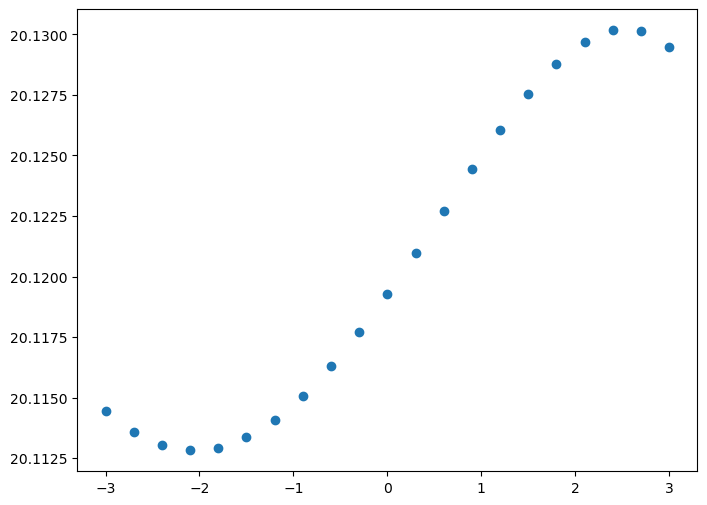

In [5]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [17]:
# optimisation targets
qx = 20.13
qy = 20.17
dqx_rel = 0.5
dqy_rel = 0.5

In [18]:
dqx_calc = (20.09-20.13)/(-3.1e-3)
dqy_calc = 1e-2/6
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_calc, dqy=dqy_calc, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 0.2583                            
Matching: model call n. 7 penalty = 8.2926e-05              
Optimize - end penalty:  8.2926e-05                            


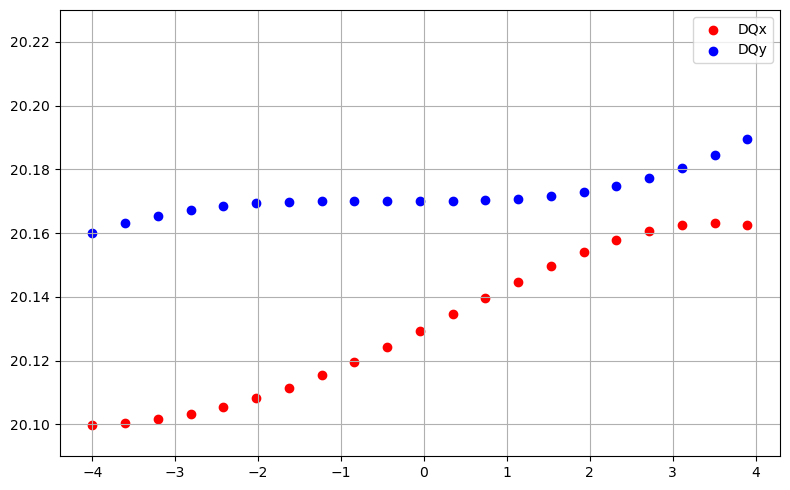

In [19]:
deltas = np.linspace(-4e-3, 3.9e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='DQx', color='red')
ax.scatter(deltas*1e3, [twiss.qy for twiss in twisses], label='DQy', color='blue')
ax.grid()
ax.legend()
ax.set_ylim(20.09, 20.23)
fig.tight_layout()
plt.savefig('tune_vs_delta.png', transparent=True)